# Small Data Science Project
#### 21727187
#### Oğuzhan DURSUN
#### 21827919
#### Alperen TORAMAN



## Data Understanding<a class="anchor" id="data_understanding"></a>

In [106]:
data = pd.read_excel("sdsp_patients.xlsx")
data

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
0,Disease_1,Male,28.0,130,96.0,2.0,No,Yes,Yes,No,...,No,No,No,0,No,No,No,No,No,No
1,Disease_1,Male,18.0,95,46.0,3.0,Yes,No,No,No,...,No,Yes,No,0,No,No,No,No,No,No
2,Disease_1,Male,44.0,152,150.0,1.0,No,Yes,No,Yes,...,Yes,No,No,0,No,No,No,No,No,No
3,Disease_1,Male,19.0,112,66.0,18.0,No,No,No,Yes,...,No,Yes,No,0,No,No,No,No,No,No
4,Disease_1,Male,17.5,105.5,54.0,3.0,No,No,Yes,Yes,...,No,No,No,0,No,No,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Disease_1,Female,36.0,142,144.0,24.0,No,No,No,Yes,...,Yes,No,No,8,Yes,No,No,No,No,No
396,Disease_1,Male,60.0,172,165.0,120.0,No,No,Yes,No,...,No,No,No,9,Yes,No,No,No,No,No
397,Disease_1,Female,41.0,147,156.0,60.0,No,Yes,No,No,...,No,No,No,9,Yes,Yes,Yes,No,No,No
398,Disease_1,Male,37.0,138,144.0,120.0,No,Yes,No,No,...,No,No,No,9,Yes,No,No,No,No,No


In [107]:
data.head()

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
0,Disease_1,Male,28.0,130,96.0,2.0,No,Yes,Yes,No,...,No,No,No,0,No,No,No,No,No,No
1,Disease_1,Male,18.0,95,46.0,3.0,Yes,No,No,No,...,No,Yes,No,0,No,No,No,No,No,No
2,Disease_1,Male,44.0,152,150.0,1.0,No,Yes,No,Yes,...,Yes,No,No,0,No,No,No,No,No,No
3,Disease_1,Male,19.0,112,66.0,18.0,No,No,No,Yes,...,No,Yes,No,0,No,No,No,No,No,No
4,Disease_1,Male,17.5,105.5,54.0,3.0,No,No,Yes,Yes,...,No,No,No,0,No,No,No,No,Yes,No


In [108]:
nunique = data.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
data = data.drop(cols_to_drop, axis=1)

In [109]:
data = data.replace(r'^\s*$', np.nan, regex=True)

In [110]:
data.isnull().sum()

Disease         0
Feature_1       0
Feature_2       0
Feature_3       2
Feature_4       0
Feature_5       0
Feature_6       0
Feature_7       0
Feature_8       0
Feature_9       0
Feature_10      0
Feature_11      0
Feature_12      0
Feature_13      0
Feature_14      0
Feature_15      0
Feature_17      0
Feature_18      0
Feature_20      0
Feature_21      0
Feature_22      0
Feature_23      0
Feature_24      0
Feature_26      0
Feature_27      0
Feature_28      1
Feature_29      0
Feature_30      0
Feature_31      0
Feature_32     16
Feature_33     12
Feature_34      0
Feature_35     43
Feature_36    259
Feature_37      0
Feature_38      0
Feature_39      0
Feature_40      0
Feature_41      0
Feature_42      0
Feature_43      0
Feature_44      0
Feature_45      0
Feature_46      0
Feature_47     20
Feature_48     20
Feature_49     20
Feature_50     24
dtype: int64

In [111]:
isNotNull = data.isnull().sum() < data.shape[0]/20

In [112]:
data = data[isNotNull.index[isNotNull]]

In [113]:
data.isnull().sum()

Disease        0
Feature_1      0
Feature_2      0
Feature_3      2
Feature_4      0
Feature_5      0
Feature_6      0
Feature_7      0
Feature_8      0
Feature_9      0
Feature_10     0
Feature_11     0
Feature_12     0
Feature_13     0
Feature_14     0
Feature_15     0
Feature_17     0
Feature_18     0
Feature_20     0
Feature_21     0
Feature_22     0
Feature_23     0
Feature_24     0
Feature_26     0
Feature_27     0
Feature_28     1
Feature_29     0
Feature_30     0
Feature_31     0
Feature_32    16
Feature_33    12
Feature_34     0
Feature_37     0
Feature_38     0
Feature_39     0
Feature_40     0
Feature_41     0
Feature_42     0
Feature_43     0
Feature_44     0
Feature_45     0
Feature_46     0
dtype: int64

In [114]:
data = data.fillna(data.mode().iloc[0])

In [115]:
data.isnull().sum()

Disease       0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_17    0
Feature_18    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
Feature_31    0
Feature_32    0
Feature_33    0
Feature_34    0
Feature_37    0
Feature_38    0
Feature_39    0
Feature_40    0
Feature_41    0
Feature_42    0
Feature_43    0
Feature_44    0
Feature_45    0
Feature_46    0
dtype: int64

In [116]:
len(data)-len(data.drop_duplicates())

0

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    object 
 1   Feature_1   400 non-null    object 
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    float64
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    object 
 7   Feature_7   400 non-null    object 
 8   Feature_8   400 non-null    object 
 9   Feature_9   400 non-null    object 
 10  Feature_10  400 non-null    object 
 11  Feature_11  400 non-null    object 
 12  Feature_12  400 non-null    object 
 13  Feature_13  400 non-null    object 
 14  Feature_14  400 non-null    object 
 15  Feature_15  400 non-null    object 
 16  Feature_17  400 non-null    object 
 17  Feature_18  400 non-null    object 
 18  Feature_20  400 non-null    object 
 19  Feature_21  400 non-null    o

In [118]:
copydf = data.copy(deep=True)

In [119]:
data.describe()

,Feature_2,Feature_3,Feature_4,Feature_5,Feature_44
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,29.410125,127.681750,108.104000,23.038050,0.457500
std,14.350309,22.507814,49.526425,24.742478,1.547314
min,10.000000,76.000000,12.000000,0.060000,0.000000
25%,18.000000,110.000000,64.500000,6.000000,0.000000
50%,25.525000,127.500000,108.000000,12.000000,0.000000
75%,38.000000,147.000000,144.000000,36.000000,0.000000
max,90.000000,181.000000,213.000000,168.000000,9.000000


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    object 
 1   Feature_1   400 non-null    object 
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    float64
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    object 
 7   Feature_7   400 non-null    object 
 8   Feature_8   400 non-null    object 
 9   Feature_9   400 non-null    object 
 10  Feature_10  400 non-null    object 
 11  Feature_11  400 non-null    object 
 12  Feature_12  400 non-null    object 
 13  Feature_13  400 non-null    object 
 14  Feature_14  400 non-null    object 
 15  Feature_15  400 non-null    object 
 16  Feature_17  400 non-null    object 
 17  Feature_18  400 non-null    object 
 18  Feature_20  400 non-null    object 
 19  Feature_21  400 non-null    o

In [121]:
willEncode = data.select_dtypes(include=['object'])

In [122]:
from sklearn.preprocessing import LabelEncoder
encoded = willEncode.apply(LabelEncoder().fit_transform).astype('int64')

In [123]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Disease     400 non-null    int64
 1   Feature_1   400 non-null    int64
 2   Feature_6   400 non-null    int64
 3   Feature_7   400 non-null    int64
 4   Feature_8   400 non-null    int64
 5   Feature_9   400 non-null    int64
 6   Feature_10  400 non-null    int64
 7   Feature_11  400 non-null    int64
 8   Feature_12  400 non-null    int64
 9   Feature_13  400 non-null    int64
 10  Feature_14  400 non-null    int64
 11  Feature_15  400 non-null    int64
 12  Feature_17  400 non-null    int64
 13  Feature_18  400 non-null    int64
 14  Feature_20  400 non-null    int64
 15  Feature_21  400 non-null    int64
 16  Feature_22  400 non-null    int64
 17  Feature_23  400 non-null    int64
 18  Feature_24  400 non-null    int64
 19  Feature_26  400 non-null    int64
 20  Feature_27  400 non-null    int6

In [124]:
data['Feature_29'].unique()

array(['No Difference', 'Evenings', 'Mornings'], dtype=object)

In [125]:
data.update(encoded)

In [126]:
copydf

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46
0,Disease_1,Male,28.0,130.0,96.0,2.0,No,Yes,Yes,No,...,No,No,No,No,No,No,No,0,No,No
1,Disease_1,Male,18.0,95.0,46.0,3.0,Yes,No,No,No,...,No,No,No,No,No,Yes,No,0,No,No
2,Disease_1,Male,44.0,152.0,150.0,1.0,No,Yes,No,Yes,...,Yes,No,No,No,Yes,No,No,0,No,No
3,Disease_1,Male,19.0,112.0,66.0,18.0,No,No,No,Yes,...,No,No,No,No,No,Yes,No,0,No,No
4,Disease_1,Male,17.5,105.5,54.0,3.0,No,No,Yes,Yes,...,No,No,No,No,No,No,No,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Disease_1,Female,36.0,142.0,144.0,24.0,No,No,No,Yes,...,No,No,No,No,Yes,No,No,8,Yes,No
396,Disease_1,Male,60.0,172.0,165.0,120.0,No,No,Yes,No,...,No,No,No,No,No,No,No,9,Yes,No
397,Disease_1,Female,41.0,147.0,156.0,60.0,No,Yes,No,No,...,No,No,No,No,No,No,No,9,Yes,Yes
398,Disease_1,Male,37.0,138.0,144.0,120.0,No,Yes,No,No,...,No,No,No,No,No,No,No,9,Yes,No


In [127]:
data

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46
0,0,1,28.0,130.0,96.0,2.0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,18.0,95.0,46.0,3.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,44.0,152.0,150.0,1.0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
3,0,1,19.0,112.0,66.0,18.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,1,17.5,105.5,54.0,3.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,36.0,142.0,144.0,24.0,0,0,0,1,...,0,0,0,0,1,0,0,8,1,0
396,0,1,60.0,172.0,165.0,120.0,0,0,1,0,...,0,0,0,0,0,0,0,9,1,0
397,0,0,41.0,147.0,156.0,60.0,0,1,0,0,...,0,0,0,0,0,0,0,9,1,1
398,0,1,37.0,138.0,144.0,120.0,0,1,0,0,...,0,0,0,0,0,0,0,9,1,0


In [128]:
data = data.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    float64
 1   Feature_1   400 non-null    float64
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    float64
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    float64
 7   Feature_7   400 non-null    float64
 8   Feature_8   400 non-null    float64
 9   Feature_9   400 non-null    float64
 10  Feature_10  400 non-null    float64
 11  Feature_11  400 non-null    float64
 12  Feature_12  400 non-null    float64
 13  Feature_13  400 non-null    float64
 14  Feature_14  400 non-null    float64
 15  Feature_15  400 non-null    float64
 16  Feature_17  400 non-null    float64
 17  Feature_18  400 non-null    float64
 18  Feature_20  400 non-null    float64
 19  Feature_21  400 non-null    f

## Data Preparation<a class="anchor" id="data_preparation"></a>

In [129]:
y = data['Disease']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    float64
 1   Feature_1   400 non-null    float64
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    float64
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    float64
 7   Feature_7   400 non-null    float64
 8   Feature_8   400 non-null    float64
 9   Feature_9   400 non-null    float64
 10  Feature_10  400 non-null    float64
 11  Feature_11  400 non-null    float64
 12  Feature_12  400 non-null    float64
 13  Feature_13  400 non-null    float64
 14  Feature_14  400 non-null    float64
 15  Feature_15  400 non-null    float64
 16  Feature_17  400 non-null    float64
 17  Feature_18  400 non-null    float64
 18  Feature_20  400 non-null    float64
 19  Feature_21  400 non-null    f

(400, 42)


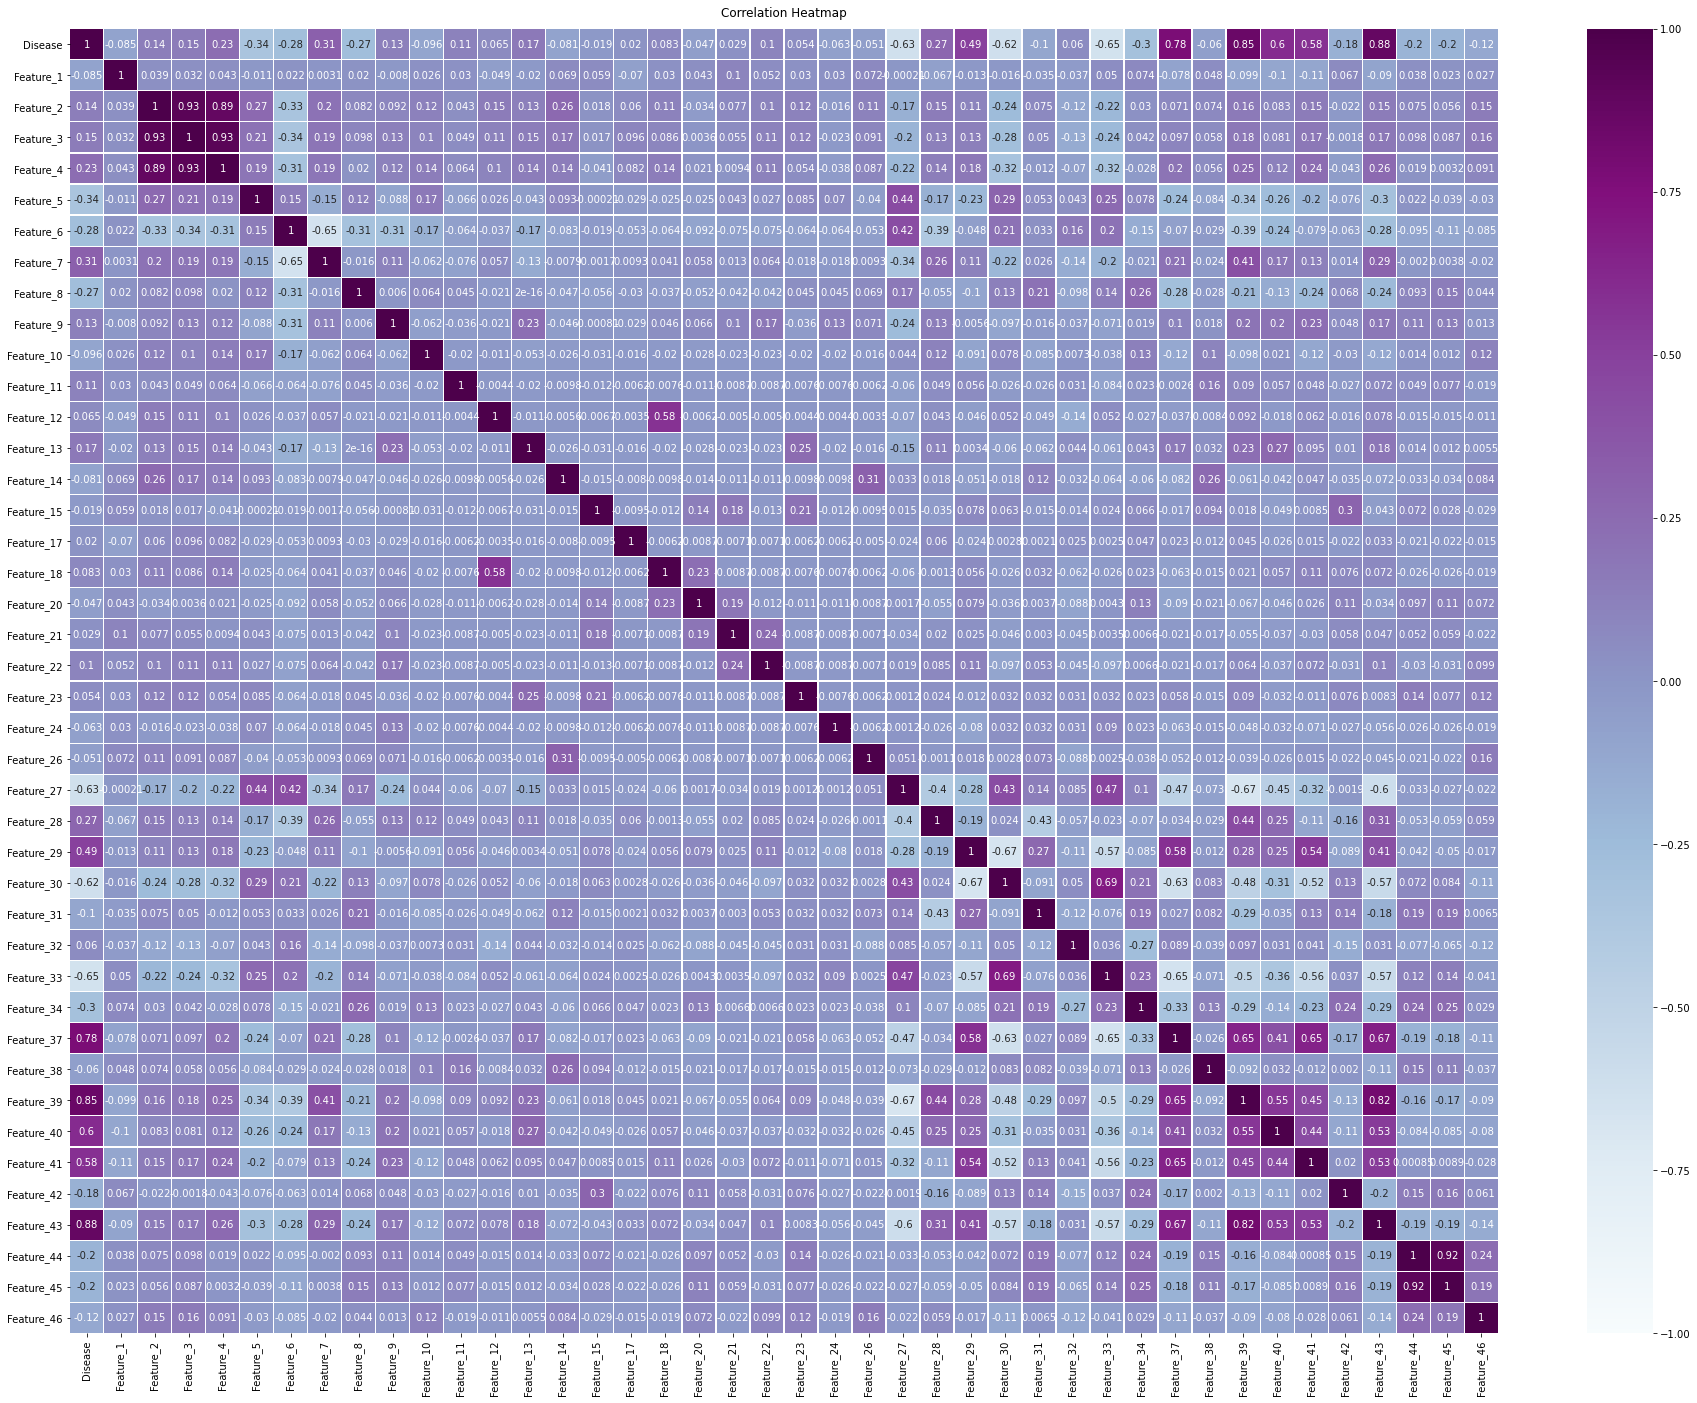

In [130]:
corr = data.corr()
corr.head()
plt.figure(figsize=(32, 24))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1,linewidths=.2, annot=True,cmap="BuPu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
print(data.shape)

Correlation matrix shows the relationship between features. If the value approaches 1, there is a strong positive correlation, if approaching -1, there is a strong negative correlation. If it approaches 0 it gets weaker, and if it is 0, there is no correlation. We compare the correlation between features and remove one of two features that have a correlation higher than 0.9.

In [131]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.95:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
selectedFeature = data[selected_columns]


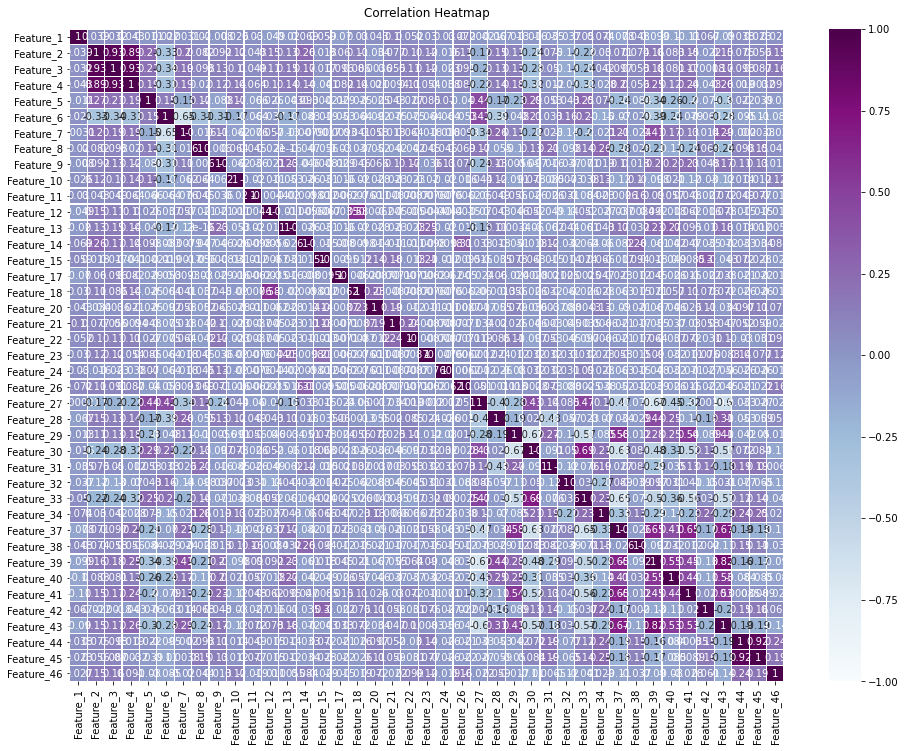

In [132]:
od = selectedFeature.drop(columns=['Disease'])
corr = od.corr()
corr.head()
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1,linewidths=.2, annot=True,cmap="BuPu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [133]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)

    regressor_OLS.summary()
    return x, columns

In [134]:
SL = 0.01
data_modeled, selected_columns = backwardElimination(selectedFeature.iloc[:,1:].values, selectedFeature.iloc[:,0].values, SL, selected_columns)


In [135]:
print(selected_columns)

Index(['Feature_2', 'Feature_3', 'Feature_8', 'Feature_10', 'Feature_17',
       'Feature_21', 'Feature_29', 'Feature_34', 'Feature_38', 'Feature_39',
       'Feature_42', 'Feature_46'],
      dtype='object')


In [136]:
selectedFeature = selectedFeature[selected_columns]
copydf = copydf[selected_columns]
selectedFeature.shape


(400, 12)

In [137]:
copydf.shape

(400, 12)

Feature selection is the process of selecting and finding important features within the data set. This process greatly affects the performance of the machine learning model. Because unnecessary features increase training time. At the same time, we usually want the model to be descriptive and simple, too many features reduce our ability to interpret. Using correlation, we selected according to the degrees of linearly related features. After doing this process, we come to another important issue, normalization.

In [138]:
selectedFeature

,Feature_2,Feature_3,Feature_8,Feature_10,Feature_17,Feature_21,Feature_29,Feature_34,Feature_38,Feature_39,Feature_42,Feature_46
0,28.0,130.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,18.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,44.0,152.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,19.0,112.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,17.5,105.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,36.0,142.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
396,60.0,172.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
397,41.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,37.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
selected_columns

Index(['Feature_2', 'Feature_3', 'Feature_8', 'Feature_10', 'Feature_17',
       'Feature_21', 'Feature_29', 'Feature_34', 'Feature_38', 'Feature_39',
       'Feature_42', 'Feature_46'],
      dtype='object')

In [140]:
selectedJson = {}


In [141]:
for value in selected_columns:
    tempDict = {}
    if(len(copydf[value].unique()) == 2):
        tempDict['name'] = value
        tempDict['type'] = "radioButton"
        tempDict['values'] = sorted(copydf[value].unique().tolist())
    elif(len(copydf[value].unique()) > 2 and len(copydf[value].unique()) <= 10):
        tempDict['name'] = value
        tempDict['type'] = "selectBox"
        tempDict['values'] = sorted(copydf[value].unique().tolist())
    else:
        tempDict['name'] = value
        tempDict['type'] = "textBox"
        tempDict['min'] = min(copydf[value].unique().tolist())
        tempDict['max'] = max(copydf[value].unique().tolist())
    selectedJson[value] = tempDict

In [142]:
import joblib

joblib.dump(selectedJson,'selected.pkl')

['selected.pkl']

In [143]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(selectedFeature,y,test_size = 0.2, random_state = 42)

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {"C": np.logspace(-3,3,7), "penalty" : ["l1","l2"]}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv = 10)
logreg_cv.fit(x_train,y_train) 

C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\model_se

C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\OGUZHAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [145]:
d = {'Feature_2': [28.0], 'Feature_3': [130.0], 'Feature_8': [1.0], 'Feature_10': [0.0], 'Feature_17': [0.0],  'Feature_21': [0.0],'Feature_29': [0.0], 'Feature_34': [0.0], 'Feature_38': [0.0], 'Feature_39': [0.0], 'Feature_42': [0.0],'Feature_46': [0.0]}
df = pd.DataFrame(d)


print(logreg_cv.predict_proba(df)[0])

print("accuracy: ", logreg_cv.best_score_)

[9.89666395e-01 1.12434377e-03 8.44938904e-03 7.59871696e-04]
accuracy:  0.8875


In [146]:
logreg_cv

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [147]:
joblib.dump(logreg_cv,'logreg_cv.pkl')

['logreg_cv.pkl']